In [1]:
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('subscribers.csv')
data

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,...,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
0,162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,...,NaN,ar,Standard Charter,14,True,1,2020/2/7 21:44,2020/6/7 21:44,NaN,True
1,380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,...,0.3303,ar,NaN,14,True,1,2020/3/15 15:44,2020/7/15 15:44,NaN,True
2,496617,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,...,0.1101,ar,NaN,14,False,0,NaN,NaN,NaN,True
3,356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,30.0,False,...,0.0367,ar,NaN,14,False,0,NaN,NaN,NaN,True
4,681701,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,...,0.0367,ar,NaN,14,True,2,2020/2/19 12:57,2020/6/19 12:57,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227623,509326,21434712,enhanced,3.0,comedy,supplement OTT,28.751405,2.0,38.0,False,...,0.3303,ar,NaN,14,True,1,2019/12/1 14:12,2020/4/1 14:12,NaN,True
227624,229587,25843074,enhanced,2.0,comedy,replace OTT,27.301448,2.0,49.0,False,...,0.3303,ar,Paypal,14,True,1,2019/12/20 18:02,2020/4/20 18:02,NaN,True
227625,281340,24799085,base,NaN,comedy,access to exclusive content,31.651317,NaN,45.0,False,...,0.0367,ar,NaN,14,True,1,2020/1/4 19:40,2020/5/4 19:40,NaN,True
227626,87198,21308040,base,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,...,NaN,ar,Paypal,14,True,1,2020/1/31 23:58,2020/5/31 23:58,NaN,True


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227628 entries, 0 to 227627
Data columns (total 31 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    227628 non-null  int64  
 1   subid                         227628 non-null  int64  
 2   package_type                  192054 non-null  object 
 3   num_weekly_services_utilized  117178 non-null  float64
 4   preferred_genre               191302 non-null  object 
 5   intended_use                  224079 non-null  object 
 6   weekly_consumption_hour       189698 non-null  float64
 7   num_ideal_streaming_services  115458 non-null  float64
 8   age                           192459 non-null  float64
 9   male_TF                       227359 non-null  object 
 10  country                       227628 non-null  object 
 11  attribution_technical         227628 non-null  object 
 12  attribution_survey            224984 non-nul

In [4]:
#对Age先处理一下
for i in range(0,len(data)):
    if (data.loc[i,'age']>1930)&(data.loc[i,'age']<2018):
        data.loc[i,'age']=2020-data.loc[i,'age']
    elif (data.loc[i,'age']>100)&(data.loc[i,'age']<1930):
        data.loc[i,'age']=None
    elif data.loc[i,'age']>2018:
        data.loc[i,'age']=None

In [5]:
#把age和package type里的na值 去掉
data.dropna(subset=["age"],inplace=True)
#data.reset_index(inplace=True)

In [6]:
a=data.num_weekly_services_utilized.mean()
b=data.num_ideal_streaming_services.mean()
#data.fillna(data.mode().iloc['num_weekly_services_utilized','num_weekly_services_utilized'])
data['num_weekly_services_utilized'].fillna(a,inplace=True)
data['num_ideal_streaming_services'].fillna(b,inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192329 entries, 1 to 227627
Data columns (total 31 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    192329 non-null  int64  
 1   subid                         192329 non-null  int64  
 2   package_type                  156803 non-null  object 
 3   num_weekly_services_utilized  192329 non-null  float64
 4   preferred_genre               156053 non-null  object 
 5   intended_use                  188816 non-null  object 
 6   weekly_consumption_hour       189568 non-null  float64
 7   num_ideal_streaming_services  192329 non-null  float64
 8   age                           192329 non-null  float64
 9   male_TF                       192325 non-null  object 
 10  country                       192329 non-null  object 
 11  attribution_technical         192329 non-null  object 
 12  attribution_survey            189720 non-nul

In [7]:
data.drop(columns=['Unnamed: 0'],axis=1,inplace=True)
data.dropna(subset=['package_type','preferred_genre'],inplace=True)
data = data.drop(data[data['weekly_consumption_hour']<0].index)
data.dropna(subset=['weekly_consumption_hour','intended_use','male_TF','op_sys','attribution_survey'],inplace=True)

In [33]:
data

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,country,...,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
2,26844789,enhanced,3.00000,regional,replace OTT,36.001186,2.000000,25.0,True,UAE,...,0.1101,ar,NaN,14,False,0,NaN,NaN,NaN,True
3,29417030,base,3.00893,drama,replace OTT,20.051667,2.061286,30.0,False,UAE,...,0.0367,ar,NaN,14,False,0,NaN,NaN,NaN,True
4,26723159,base,4.00000,comedy,replace OTT,22.951579,3.000000,28.0,False,UAE,...,0.0367,ar,NaN,14,True,2,2020/2/19 12:57,2020/6/19 12:57,NaN,True
6,29726122,base,2.00000,comedy,access to exclusive content,20.051667,2.000000,61.0,False,UAE,...,0.3303,ar,Standard Charter,14,True,1,2020/3/4 18:30,2020/7/4 18:30,NaN,True
7,20299962,base,3.00000,drama,access to exclusive content,34.551230,2.000000,23.0,False,UAE,...,0.0000,ar,RAKBANK,14,True,1,2020/3/19 14:52,2020/7/19 14:52,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227622,25835684,base,2.00000,drama,access to exclusive content,24.401536,2.000000,43.0,False,UAE,...,0.0000,ar,NaN,14,True,1,2020/1/15 22:43,2020/5/15 22:43,NaN,True
227623,21434712,enhanced,3.00000,comedy,supplement OTT,28.751405,2.000000,38.0,False,UAE,...,0.3303,ar,NaN,14,True,1,2019/12/1 14:12,2020/4/1 14:12,NaN,True
227624,25843074,enhanced,2.00000,comedy,replace OTT,27.301448,2.000000,49.0,False,UAE,...,0.3303,ar,Paypal,14,True,1,2019/12/20 18:02,2020/4/20 18:02,NaN,True
227625,24799085,base,3.00893,comedy,access to exclusive content,31.651317,2.061286,45.0,False,UAE,...,0.0367,ar,NaN,14,True,1,2020/1/4 19:40,2020/5/4 19:40,NaN,True


In [8]:
variable=data.iloc[:,0:13]
variable.drop(columns=['attribution_survey','country'],axis=1,inplace=True)
variable

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,attribution_technical,op_sys
2,26844789,enhanced,3.00000,regional,replace OTT,36.001186,2.000000,25.0,True,organic,iOS
3,29417030,base,3.00893,drama,replace OTT,20.051667,2.061286,30.0,False,search,Android
4,26723159,base,4.00000,comedy,replace OTT,22.951579,3.000000,28.0,False,discovery,iOS
6,29726122,base,2.00000,comedy,access to exclusive content,20.051667,2.000000,61.0,False,bing,Android
7,20299962,base,3.00000,drama,access to exclusive content,34.551230,2.000000,23.0,False,email,iOS
...,...,...,...,...,...,...,...,...,...,...,...
227622,25835684,base,2.00000,drama,access to exclusive content,24.401536,2.000000,43.0,False,email,iOS
227623,21434712,enhanced,3.00000,comedy,supplement OTT,28.751405,2.000000,38.0,False,facebook,iOS
227624,25843074,enhanced,2.00000,comedy,replace OTT,27.301448,2.000000,49.0,False,google_organic,iOS
227625,24799085,base,3.00893,comedy,access to exclusive content,31.651317,2.061286,45.0,False,facebook,iOS


In [14]:
variable_clean = pd.get_dummies(variable,drop_first=True)
variable_clean=variable_clean.iloc[:,1:51]
variable_clean

,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,package_type_economy,package_type_enhanced,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,...,attribution_technical_playstore,attribution_technical_podcast,attribution_technical_quora,attribution_technical_referral,attribution_technical_samsung,attribution_technical_search,attribution_technical_tv,attribution_technical_vod,attribution_technical_youtube,op_sys_iOS
2,3.00000,36.001186,2.000000,25.0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,3.00893,20.051667,2.061286,30.0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,4.00000,22.951579,3.000000,28.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,2.00000,20.051667,2.000000,61.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3.00000,34.551230,2.000000,23.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227622,2.00000,24.401536,2.000000,43.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
227623,3.00000,28.751405,2.000000,38.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
227624,2.00000,27.301448,2.000000,49.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
227625,3.00893,31.651317,2.061286,45.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [15]:
from sklearn.mixture import GaussianMixture 

In [16]:
scaler = MinMaxScaler()
scaler.fit(variable_clean)
# transform
data_scaled = pd.DataFrame(scaler.transform(variable_clean),columns=variable_clean.columns)
data_scaled

,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,package_type_economy,package_type_enhanced,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,...,attribution_technical_playstore,attribution_technical_podcast,attribution_technical_quora,attribution_technical_referral,attribution_technical_samsung,attribution_technical_search,attribution_technical_tv,attribution_technical_vod,attribution_technical_youtube,op_sys_iOS
0,0.214286,0.450980,0.285714,0.25,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.214924,0.235294,0.294469,0.30,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.285714,0.274510,0.428571,0.28,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.142857,0.235294,0.285714,0.61,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.214286,0.431373,0.285714,0.23,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144044,0.142857,0.294118,0.285714,0.43,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
144045,0.214286,0.352941,0.285714,0.38,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
144046,0.142857,0.333333,0.285714,0.49,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
144047,0.214924,0.392157,0.294469,0.45,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [17]:
inertias = {}
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=2020)
    kmeans.fit(data_scaled)  # here we do not use fit_transform since we don't need the transformed result
    inertias[k] = kmeans.inertia_
print(inertias)

{1: 315369.46034920827, 2: 279491.4950179481, 3: 257056.76451549004, 4: 241988.9549110693, 5: 230096.48516262753, 6: 220253.23718393457, 7: 216343.71861189857, 8: 212922.0852387482, 9: 204732.2980284687, 10: 197798.3630905658, 11: 193753.4934910536, 12: 187488.40818507626, 13: 184681.37007329, 14: 183781.59172260764, 15: 181166.2099297428, 16: 176922.29109770773, 17: 172212.41648355807, 18: 170967.2391493137, 19: 167825.07148822033}


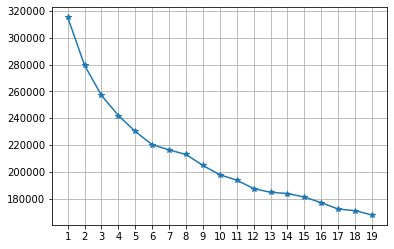

In [18]:
ax = plt.subplot()
k=list(inertias.keys())
v=list(inertias.values())
ax.plot(k,v, '-*')
ax.set_xticks(np.arange(1, 20))
ax.grid()
plt.show()

In [20]:
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k, random_state=1996)
y_pred = kmeans.fit_predict(data_scaled)
y_pred

array([0, 4, 3, ..., 0, 2, 3], dtype=int32)

In [23]:
y_pred=pd.DataFrame(y_pred)
data_scaled['Cluster']=y_pred
data_scaled

,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,package_type_economy,package_type_enhanced,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,...,attribution_technical_podcast,attribution_technical_quora,attribution_technical_referral,attribution_technical_samsung,attribution_technical_search,attribution_technical_tv,attribution_technical_vod,attribution_technical_youtube,op_sys_iOS,Cluster
0,0.214286,0.450980,0.285714,0.25,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,0.214924,0.235294,0.294469,0.30,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4
2,0.285714,0.274510,0.428571,0.28,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3
3,0.142857,0.235294,0.285714,0.61,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
4,0.214286,0.431373,0.285714,0.23,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144044,0.142857,0.294118,0.285714,0.43,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3
144045,0.214286,0.352941,0.285714,0.38,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
144046,0.142857,0.333333,0.285714,0.49,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
144047,0.214924,0.392157,0.294469,0.45,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2


In [24]:
data_scaled['Cluster']

0         0
1         4
2         3
3         4
4         3
         ..
144044    3
144045    1
144046    0
144047    2
144048    3
Name: Cluster, Length: 144049, dtype: int32

In [27]:
#data_scaled['Cluster'==0].value_counts()

data_scaled.groupby('Cluster').count()

,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,package_type_economy,package_type_enhanced,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,...,attribution_technical_playstore,attribution_technical_podcast,attribution_technical_quora,attribution_technical_referral,attribution_technical_samsung,attribution_technical_search,attribution_technical_tv,attribution_technical_vod,attribution_technical_youtube,op_sys_iOS
Cluster,,,,,,,,,,,,,,,,,,,,,
0,21519,21519,21519,21519,21519,21519,21519,21519,21519,21519,...,21519,21519,21519,21519,21519,21519,21519,21519,21519,21519
1,28634,28634,28634,28634,28634,28634,28634,28634,28634,28634,...,28634,28634,28634,28634,28634,28634,28634,28634,28634,28634
2,29908,29908,29908,29908,29908,29908,29908,29908,29908,29908,...,29908,29908,29908,29908,29908,29908,29908,29908,29908,29908
3,41322,41322,41322,41322,41322,41322,41322,41322,41322,41322,...,41322,41322,41322,41322,41322,41322,41322,41322,41322,41322
4,22666,22666,22666,22666,22666,22666,22666,22666,22666,22666,...,22666,22666,22666,22666,22666,22666,22666,22666,22666,22666


In [28]:
variable.reset_index(level=None, drop=False, inplace=True, col_level=0, col_fill='') 


In [29]:

variable.drop(columns=['index'],axis=1,inplace=True)
variable['Cluster'] = data_scaled['Cluster']
variable

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,attribution_technical,op_sys,Cluster
0,26844789,enhanced,3.00000,regional,replace OTT,36.001186,2.000000,25.0,True,organic,iOS,0
1,29417030,base,3.00893,drama,replace OTT,20.051667,2.061286,30.0,False,search,Android,4
2,26723159,base,4.00000,comedy,replace OTT,22.951579,3.000000,28.0,False,discovery,iOS,3
3,29726122,base,2.00000,comedy,access to exclusive content,20.051667,2.000000,61.0,False,bing,Android,4
4,20299962,base,3.00000,drama,access to exclusive content,34.551230,2.000000,23.0,False,email,iOS,3
...,...,...,...,...,...,...,...,...,...,...,...,...
144044,25835684,base,2.00000,drama,access to exclusive content,24.401536,2.000000,43.0,False,email,iOS,3
144045,21434712,enhanced,3.00000,comedy,supplement OTT,28.751405,2.000000,38.0,False,facebook,iOS,1
144046,25843074,enhanced,2.00000,comedy,replace OTT,27.301448,2.000000,49.0,False,google_organic,iOS,0
144047,24799085,base,3.00893,comedy,access to exclusive content,31.651317,2.061286,45.0,False,facebook,iOS,2


In [36]:
data=data.reset_index(drop=True)

In [37]:

data['Cluster'] = data_scaled['Cluster']
data


,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,country,...,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed,Cluster
0,26844789,enhanced,3.00000,regional,replace OTT,36.001186,2.000000,25.0,True,UAE,...,ar,NaN,14,False,0,NaN,NaN,NaN,True,0
1,29417030,base,3.00893,drama,replace OTT,20.051667,2.061286,30.0,False,UAE,...,ar,NaN,14,False,0,NaN,NaN,NaN,True,4
2,26723159,base,4.00000,comedy,replace OTT,22.951579,3.000000,28.0,False,UAE,...,ar,NaN,14,True,2,2020/2/19 12:57,2020/6/19 12:57,NaN,True,3
3,29726122,base,2.00000,comedy,access to exclusive content,20.051667,2.000000,61.0,False,UAE,...,ar,Standard Charter,14,True,1,2020/3/4 18:30,2020/7/4 18:30,NaN,True,4
4,20299962,base,3.00000,drama,access to exclusive content,34.551230,2.000000,23.0,False,UAE,...,ar,RAKBANK,14,True,1,2020/3/19 14:52,2020/7/19 14:52,NaN,True,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144044,25835684,base,2.00000,drama,access to exclusive content,24.401536,2.000000,43.0,False,UAE,...,ar,NaN,14,True,1,2020/1/15 22:43,2020/5/15 22:43,NaN,True,3
144045,21434712,enhanced,3.00000,comedy,supplement OTT,28.751405,2.000000,38.0,False,UAE,...,ar,NaN,14,True,1,2019/12/1 14:12,2020/4/1 14:12,NaN,True,1
144046,25843074,enhanced,2.00000,comedy,replace OTT,27.301448,2.000000,49.0,False,UAE,...,ar,Paypal,14,True,1,2019/12/20 18:02,2020/4/20 18:02,NaN,True,0
144047,24799085,base,3.00893,comedy,access to exclusive content,31.651317,2.061286,45.0,False,UAE,...,ar,NaN,14,True,1,2020/1/4 19:40,2020/5/4 19:40,NaN,True,2


In [49]:
#variable_clean['Cluster'] = data_scaled['Cluster']
cluster_0 = data[data['Cluster']==0]
#c0=cluster_0.mean()
#cluster_0
cluster_0['current_sub_TF'].value_counts()

True     11252
False    10267
Name: current_sub_TF, dtype: int64

In [50]:
cluster_0['male_TF'].value_counts()

False    18366
True      3153
Name: male_TF, dtype: int64

In [52]:
cluster_1 = data[data['Cluster']==1]
#c0=cluster_0.mean()
#cluster_0
cluster_1['current_sub_TF'].value_counts()

True     25352
False     3282
Name: current_sub_TF, dtype: int64

In [60]:
cluster_0['age'].describe()

count    21519.000000
mean        41.005996
std         12.790831
min          0.000000
25%         31.000000
50%         40.000000
75%         50.000000
max        100.000000
Name: age, dtype: float64

In [63]:
cluster_0['male_TF'].value_counts()

False    18366
True      3153
Name: male_TF, dtype: int64

In [82]:
cluster_4['num_weekly_services_utilized'].value_counts()

3.00000     8012
3.00893     7476
2.00000     3074
4.00000     2911
5.00000      971
6.00000      186
7.00000       23
8.00000        6
9.00000        3
10.00000       2
14.00000       1
1.00000        1
Name: num_weekly_services_utilized, dtype: int64

In [53]:
cluster_1['male_TF'].value_counts()

False    24577
True      4057
Name: male_TF, dtype: int64

In [57]:
cluster_1['age'].describe()

count    28634.000000
mean        43.214302
std         13.438478
min          0.000000
25%         33.000000
50%         43.000000
75%         53.000000
max        100.000000
Name: age, dtype: float64

In [55]:
cluster_2 = data[data['Cluster']==2]
#c0=cluster_0.mean()
#cluster_0
cluster_2['current_sub_TF'].value_counts()

True     16519
False    13389
Name: current_sub_TF, dtype: int64

In [64]:
cluster_2['male_TF'].value_counts()

False    27192
True      2716
Name: male_TF, dtype: int64

In [56]:
cluster_2['age'].describe()

count    29908.000000
mean        48.858990
std         13.387937
min          0.000000
25%         39.000000
50%         50.000000
75%         59.000000
max         89.000000
Name: age, dtype: float64

In [58]:
cluster_3 = data[data['Cluster']==3]
#c0=cluster_0.mean()
#cluster_0
cluster_3['current_sub_TF'].value_counts()

True     25685
False    15637
Name: current_sub_TF, dtype: int64

In [65]:
cluster_3['male_TF'].value_counts()

False    35298
True      6024
Name: male_TF, dtype: int64

In [59]:
cluster_3['age'].describe()

count    41322.000000
mean        46.448442
std         14.128315
min          0.000000
25%         35.000000
50%         46.000000
75%         57.000000
max         87.000000
Name: age, dtype: float64

In [61]:
cluster_4 = data[data['Cluster']==4]
#c0=cluster_0.mean()
#cluster_0
cluster_4['current_sub_TF'].value_counts()

True     14336
False     8330
Name: current_sub_TF, dtype: int64

In [ ]:
cluster_1['payment'].value_counts()

In [62]:
cluster_4['age'].describe()

count    22666.000000
mean        46.924954
std         13.855151
min         18.000000
25%         36.000000
50%         47.000000
75%         58.000000
max         91.000000
Name: age, dtype: float64

In [66]:
cluster_4['male_TF'].value_counts()

False    19159
True      3507
Name: male_TF, dtype: int64

In [32]:
variable.to_csv('c2.csv')

In [38]:
data.to_csv('c3.csv')